In [1]:
import numpy as np
import pandas as pd
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)
from gtda.mapper.cluster import ParallelClustering
from gtda.mapper import Eccentricity,Entropy

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, OPTICS

In [2]:
import openpyxl
xlsx = pd.ExcelFile('41591_2020_897_MOESM3_ESM.xlsx')
df = pd.read_excel(xlsx, '(B) Figure 1B')

In [3]:
df = df.rename({'Patient ID': 'ID', 'Days after symptoms onset': 'Días despues de iniciados los síntomas','IgG S/CO': 'IgG (S/CO)', 'IgM S/CO': 'IgM (S/CO)','Severity': 'Severidad'}, axis=1)

In [4]:
df1 = df[['ID','Días despues de iniciados los síntomas', 'IgG (S/CO)', 'IgM (S/CO)', 'Severidad']]

In [5]:
df1[df1['Severidad']==1].drop(['Severidad'],axis=1)

,ID,Días despues de iniciados los síntomas,IgG (S/CO),IgM (S/CO)
1,2,11,12.978,8.157
2,3,19,71.973,25.865
4,5,14,21.945,118.031
11,12,16,8.720,3.012
14,15,17,4.258,24.242
19,20,14,4.095,4.123
32,33,10,42.440,0.813
33,34,16,9.253,11.941
47,48,10,62.749,1.120
49,50,6,0.249,0.430


In [6]:
is_sever = df1['Severidad'] == 1
isnt_sever = df1['Severidad'] == 0
data_sever = df1[is_sever].drop(['Severidad', 'ID'],axis=1)
data_not_sever = df1[isnt_sever].drop(['Severidad', 'ID'],axis=1)

In [7]:
len(data_sever),len(data_not_sever)

(39, 223)

In [8]:
data_sever.head()

,Días despues de iniciados los síntomas,IgG (S/CO),IgM (S/CO)
1,11,12.978,8.157
2,19,71.973,25.865
4,14,21.945,118.031
11,16,8.720,3.012
14,17,4.258,24.242


# Severe

## Filter: PCA*

In [9]:
filter_func =PCA(n_components=1)
cover = CubicalCover(n_intervals=46, overlap_frac=0.8) 
#100,0.9; 210,0.95; 500,0.98 are is like 46,0.8


clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [10]:
node_scale = 20
fig = plot_interactive_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    color_data = data_sever
                                   ),
fig[0]

In [15]:
graph = pipe.fit_transform(data_sever)

node_id = 15
node_elements = graph.vs["node_elements"]

print(f"""
Node ID: {node_id}
Node elements: {node_elements[node_id]}
Data points: {data_sever.iloc[node_elements[node_id]]}
""")


Node ID: 15
Node elements: [ 3  5  7 14 19 21 23 26]
Data points:      Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
11                                       16       8.720       3.012
19                                       14       4.095       4.123
33                                       16       9.253      11.941
103                                      17      14.238       2.216
147                                      21      77.231       2.870
149                                      15      29.264      82.047
153                                      19      60.968      14.376
161                                      16       7.014       2.501



## Filter: Eccentricity**

In [9]:
filter_func = Eccentricity(exponent = 1)

cover = OneDimensionalCover(n_intervals=82, overlap_frac=0.95, kind = "balanced")#70,0.9


clusterer = DBSCAN(eps = 0.1,metric='cosine',min_samples=3)

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

##############Checar "balanced" 64, 0.94

In [10]:
node_scale = 30
fig = plot_interactive_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=3, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = data_sever),
fig[0]

In [18]:
graph = pipe.fit_transform(data_sever)

In [19]:
def Nodes(nodes, data_sever,pipe):
    graph = pipe.fit_transform(data_sever)
    for i in nodes:
        node_id = i
        node_elements = graph.vs["node_elements"]
        print(f"""
        Node ID: {node_id}
        Node elements: {node_elements[node_id]}
        Data points: \n{data_sever.iloc[node_elements[node_id]]}
        """)

In [20]:
Nodes([10,11,12,13,14], data_sever, pipe)


        Node ID: 10
        Node elements: [ 1 24 30]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
2                                        19      71.973      25.865
155                                      10      72.264       1.787
187                                      12      90.705       8.982
        

        Node ID: 11
        Node elements: [ 1 24 30]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
2                                        19      71.973      25.865
155                                      10      72.264       1.787
187                                      12      90.705       8.982
        

        Node ID: 12
        Node elements: [ 1 19 24 30]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
2                                        19      71.973      25.865
147                                      21      77.231       2.870


In [13]:
filter_func = Eccentricity(exponent = 1)

cover = OneDimensionalCover(n_intervals=100, overlap_frac=0.97,kind='balanced')


clusterer = DBSCAN(eps = 0.1,metric='cosine',min_samples=3)

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)




##############Checar "balanced" 64, 0.94

In [14]:
node_scale = 30
fig = plot_interactive_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=None,
                                    color_data = data_sever),
fig[0]

In [15]:
graph = pipe.fit_transform(data_sever)

In [16]:
def Nodes(nodes, data_sever ,pipe):
    graph = pipe.fit_transform(data_sever)
    for i in nodes:
        node_id = i
        node_elements = graph.vs["node_elements"]
        print(f"""
        Node ID: {node_id}
        Node elements: {node_elements[node_id]}
        Data points: \n{data_sever.iloc[node_elements[node_id]]}
        """)

In [25]:
Nodes([0,1,9,7,10,11], data_sever, pipe)


        Node ID: 0
        Node elements: [ 0  3  5  6  7 13 14 22 26 29]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
1                                        11      12.978       8.157
11                                       16       8.720       3.012
19                                       14       4.095       4.123
32                                       10      42.440       0.813
33                                       16       9.253      11.941
100                                      12      27.979       5.048
103                                      17      14.238       2.216
152                                      12      27.511      20.625
161                                      16       7.014       2.501
185                                      16      55.371      17.215
        

        Node ID: 1
        Node elements: [ 0  3  5  6  7 14 22 26 29]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/

In [26]:
Nodes([21], data_sever, pipe)


        Node ID: 21
        Node elements: [12 18 34 36]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
92                                        9       0.933       0.482
146                                       8       3.091       4.008
237                                      19      10.630      23.847
241                                      19       4.860       3.188
        


In [27]:
Nodes([20], data_sever, pipe)


        Node ID: 20
        Node elements: [12 15 20]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
92                                        9       0.933       0.482
104                                      10       2.156       0.178
148                                       9       2.171       0.279
        


If we want to create a refinement of covers in order to search persistence features, settle a cover wich intervals are of the same length eases the work. If $M= \max \lbrace f(x): x\in X\rbrace$, $m= \min \lbrace f(x): x\in X\rbrace$, $l$ is the common length of the intervals, $n$ is the number of intervals and $q\in (0,1)$ is the overlapping percentage, then is easy to see that

$$l(n(1-q)+1) = M-m$$

Then, if we want a refinement of covers with percentages $1\%, 4\%, 18\%, 30\%, 90\%$ and $l = 0.3(M-m)$, we can calculate the number of intervals that we need.

In [28]:
percen = np.array([(3*k-7)/(3*k) for k in range(1003,1100) ])

In [29]:
fil = Eccentricity(exponent = 1).fit_transform(data_sever)
M, m = np.max(fil),np.min(fil)
M-m

3804.4280745158276

In [30]:
n = 7/3*1/(1-percen)
len(n)

97

In [31]:
val = np.concatenate((n.reshape(97,1), percen.reshape(97,1)), axis=1)

In [32]:
val

array([[1.00300000e+03, 9.97673646e-01],
       [1.00400000e+03, 9.97675963e-01],
       [1.00500000e+03, 9.97678275e-01],
       [1.00600000e+03, 9.97680583e-01],
       [1.00700000e+03, 9.97682886e-01],
       [1.00800000e+03, 9.97685185e-01],
       [1.00900000e+03, 9.97687479e-01],
       [1.01000000e+03, 9.97689769e-01],
       [1.01100000e+03, 9.97692054e-01],
       [1.01200000e+03, 9.97694335e-01],
       [1.01300000e+03, 9.97696611e-01],
       [1.01400000e+03, 9.97698882e-01],
       [1.01500000e+03, 9.97701149e-01],
       [1.01600000e+03, 9.97703412e-01],
       [1.01700000e+03, 9.97705670e-01],
       [1.01800000e+03, 9.97707924e-01],
       [1.01900000e+03, 9.97710173e-01],
       [1.02000000e+03, 9.97712418e-01],
       [1.02100000e+03, 9.97714659e-01],
       [1.02200000e+03, 9.97716895e-01],
       [1.02300000e+03, 9.97719127e-01],
       [1.02400000e+03, 9.97721354e-01],
       [1.02500000e+03, 9.97723577e-01],
       [1.02600000e+03, 9.97725796e-01],
       [1.027000

In [17]:
filter_func = Eccentricity(exponent = 1)

cover = OneDimensionalCover(n_intervals=82, overlap_frac=0.85)#70,0.9


clusterer = DBSCAN(eps = 0.1,metric='cosine',min_samples=3)

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

##############Checar "balanced" 64, 0.94

In [18]:
fig = plot_interactive_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=2, 
                                    node_scale=30,
                                    node_color_statistic=np.mean,
                                    color_data = data_sever),
fig[0]

In [35]:
graph = pipe.fit_transform(data_sever)

In [36]:
def Nodes(nodes, data_sever,pipe):
    graph = pipe.fit_transform(data_sever)
    for i in nodes:
        node_id = i
        node_elements = graph.vs["node_elements"]
        print(f"""
        Node ID: {node_id}
        Node elements: {node_elements[node_id]}
        Data points: \n{data_sever.iloc[node_elements[node_id]]}
        """)

In [37]:
Nodes([27], data_sever, pipe)


        Node ID: 27
        Node elements: [ 9 19 32 35 37]
        Data points: 
     Días despues de iniciados los síntomas  IgG (S/CO)  IgM (S/CO)
49                                        6       0.249       0.430
147                                      21      77.231       2.870
194                                      12     114.250       3.311
239                                      23       7.389      18.280
254                                      23      16.735      12.472
        


In [38]:
percen = np.array([(k)/(k+3) for k in range(3,100) ])

In [39]:
fil = Eccentricity(exponent = 1).fit_transform(data_sever)
M, m = np.max(fil),np.min(fil)
M-m

3804.4280745158276

In [40]:
n = (1/0.1 -1)*1/(1-percen)
len(n)

97

In [41]:
val = np.concatenate((n.reshape(97,1), percen.reshape(97,1)), axis=1)

In [42]:
val

array([[ 18.        ,   0.5       ],
       [ 21.        ,   0.57142857],
       [ 24.        ,   0.625     ],
       [ 27.        ,   0.66666667],
       [ 30.        ,   0.7       ],
       [ 33.        ,   0.72727273],
       [ 36.        ,   0.75      ],
       [ 39.        ,   0.76923077],
       [ 42.        ,   0.78571429],
       [ 45.        ,   0.8       ],
       [ 48.        ,   0.8125    ],
       [ 51.        ,   0.82352941],
       [ 54.        ,   0.83333333],
       [ 57.        ,   0.84210526],
       [ 60.        ,   0.85      ],
       [ 63.        ,   0.85714286],
       [ 66.        ,   0.86363636],
       [ 69.        ,   0.86956522],
       [ 72.        ,   0.875     ],
       [ 75.        ,   0.88      ],
       [ 78.        ,   0.88461538],
       [ 81.        ,   0.88888889],
       [ 84.        ,   0.89285714],
       [ 87.        ,   0.89655172],
       [ 90.        ,   0.9       ],
       [ 93.        ,   0.90322581],
       [ 96.        ,   0.90625   ],
 

## Another experiment

In [11]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')

cover = OneDimensionalCover(n_intervals=60, overlap_frac=0.9,kind='balanced')


clusterer = DBSCAN(eps = 0.01,metric='cosine',min_samples=3)

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)




##############Checar "balanced" 64, 0.94

In [12]:
node_scale = 25
fig = plot_interactive_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = data_sever),
fig[0]

In [22]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')

cover = OneDimensionalCover(n_intervals=60, overlap_frac=0.9,kind='balanced')


clusterer = DBSCAN(eps = 0.01,metric='cosine',min_samples=3)

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

node_scale = 25
fig = plot_static_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = data_sever[['IgG (S/CO)']],
                                    plotly_params = {"layout" : {"font_size":14}})
fig.write_image("images/sev_ig.pdf")

In [23]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')

cover = OneDimensionalCover(n_intervals=60, overlap_frac=0.9,kind='balanced')


clusterer = DBSCAN(eps = 0.01,metric='cosine',min_samples=3)

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

node_scale = 25
fig = plot_static_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = data_sever[['IgM (S/CO)']],
                                    plotly_params = {"layout" : {"font_size":14}})
fig.write_image("images/sev_im.pdf")

In [24]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')

cover = OneDimensionalCover(n_intervals=60, overlap_frac=0.9,kind='balanced')


clusterer = DBSCAN(eps = 0.01,metric='cosine',min_samples=3)

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

node_scale = 25
fig = plot_static_mapper_graph(pipe, 
                                    data_sever, 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = data_sever[['Días despues de iniciados los síntomas']],
                                    plotly_params = {"layout" : {"font_size":14}})
fig.write_image("images/sev_d.pdf")

In [45]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

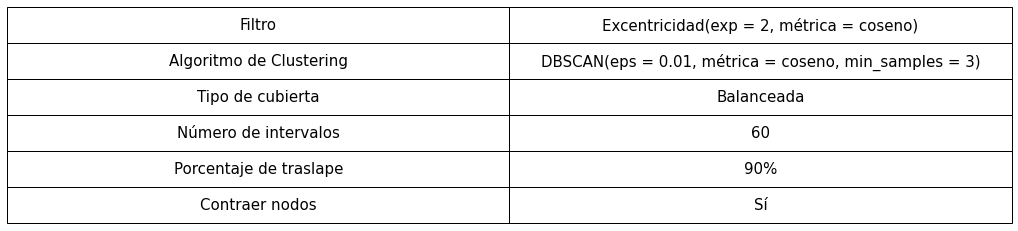

In [46]:
meta_table = plt.table(cellText=[['Filtro', 'Excentricidad(exp = 2, métrica = coseno)'], 
     ['Algoritmo de Clustering', 'DBSCAN(eps = 0.01, métrica = coseno, min_samples = 3)'],
     ['Tipo de cubierta', 'Balanceada'],
     ['Número de intervalos', '60'],
     ['Porcentaje de traslape', '90%'],
     ['Contraer nodos', 'Sí']],
         cellLoc = 'center',
         loc = 'center',
         colLoc = 'center',
         rowLoc = 'center',
         #cellColours = [['#8DD4CD','w'],['#8DD4CD','w'],['#8DD4CD','w'],['#8DD4CD','w'],['#8DD4CD','w'],['#8DD4CD','w']],
         edges = 'closed',
         #colWidths = [0.05,0.20,0.10,0.10,0.10]
         )
plt.axis('off')
meta_table.auto_set_font_size(False)
meta_table.set_fontsize(15)
meta_table.scale(3,3)
meta_fig = meta_table.figure

pp = PdfPages("tabgen3.pdf")
pp.savefig(meta_fig, bbox_inches='tight')
pp.close()